### Exercises I

- Run python -m pip install mysqlclient pymysql from your terminal to install pymysql and the mysqlclient.

- Create a notebook or python script named advanced_dataframes to do your work in for these exercises.

In [246]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

# 1. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

In [229]:
def get_db_url(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/employees'


# 2. Use your function to obtain a connection to the employees database.

In [230]:
url = get_db_url(host, user, password, 'employees')

In [286]:
#to check if it is connected and assigned as variable emp
emp= pd.read_sql('select * from employees limit 10', url)

In [232]:
print(emp)

   emp_no  birth_date first_name  last_name gender   hire_date
0   10001  1953-09-02     Georgi    Facello      M  1986-06-26
1   10002  1964-06-02    Bezalel     Simmel      F  1985-11-21
2   10003  1959-12-03      Parto    Bamford      M  1986-08-28
3   10004  1954-05-01  Chirstian    Koblick      M  1986-12-01
4   10005  1955-01-21    Kyoichi   Maliniak      M  1989-09-12
5   10006  1953-04-20     Anneke    Preusig      F  1989-06-02
6   10007  1957-05-23    Tzvetan  Zielinski      F  1989-02-10
7   10008  1958-02-19     Saniya   Kalloufi      M  1994-09-15
8   10009  1952-04-19     Sumant       Peac      F  1985-02-18
9   10010  1963-06-01  Duangkaew   Piveteau      F  1989-08-24


# 3. Once you have successfully run a query:

In [6]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


## a. Intentionally make a typo in the database url. What kind of error message do you see?

- Answer: error message is shown below cell

In [12]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:mysl.pymysql

# b. Intentionally make an error in your SQL query. 
#What does the error message look like?

- Answer: error message is shown below cell

In [8]:
pd.read_sql('SELECT * FROM empoyees LIMIT 5 OFFSET 50', url)


ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.empoyees' doesn't exist")
[SQL: SELECT * FROM empoyees LIMIT 5 OFFSET 50]
(Background on this error at: http://sqlalche.me/e/13/f405)

# 4. Read the employees and titles tables into two separate DataFrames.

In [31]:
employees = pd.read_sql('SELECT * FROM employees', url) #employees table


employees 

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [33]:
titles = pd.read_sql('SELECT * FROM titles', url) # titles table

titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


# 5. How many rows and columns do you have in each DataFrame? 
- Is that what you expected? Yes

In [21]:
# 5. How many rows and columns do you have in each DataFrame? Is that what you expected?
employees.shape # employees table columns and rows

(300024, 6)

In [19]:
titles.shape # titles table columns and rows

(443308, 4)

# 6. Display the summary statistics for each DataFrame.

In [23]:
employees.describe() #employees table statistics

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [24]:
titles.describe() # titles table statistics

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


# 7. How many unique titles are in the titles DataFrame?

In [25]:
pd.read_sql('SELECT COUNT(DISTINCT title) FROM titles' , url)


,COUNT(DISTINCT title)
0,7


# 8. What is the oldest date in the to_date column?

In [35]:
titles['to_date'].sort_values().head(1)

16064    1985-03-01
Name: to_date, dtype: object

# 9. What is the most recent date in the to_date column?

In [36]:
titles['to_date'].sort_values().tail(1)

443307    9999-01-01
Name: to_date, dtype: object

# Exercises II

# 1. Copy the users and roles DataFrames.

In [4]:
users_df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

users_df

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [5]:
roles_df = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

roles_df

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


# 2. What is the result of using a right join on the DataFrames?

In [6]:
users_right_join= users_df.merge(roles_df, left_on='role_id', right_on='id', how='right', indicator=False)

In [7]:
users_right_join

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [8]:
#another solution for # 2 with indicator as True to view whether merge key appears in left_only, right_only, or both dataframes
users_right_joinB= users_df.merge(roles_df, left_on='role_id', right_on='id', how='right', indicator=True)

In [9]:
users_right_joinB

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


# 3. What is the result of using an outer join on the DataFrames?

In [11]:
users_outer= users_df.merge(roles_df, left_on='role_id', right_on='id', how='outer', indicator=False)

In [12]:
users_outer 

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [13]:
#another solution for # 3 with indicator as True to view whether merge key appears in left_only, right_only, or both dataframes
users_outerB= users_df.merge(roles_df, left_on='role_id', right_on='id', how='outer', indicator=True)

In [14]:
users_outerB

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


# 4. What happens if you drop the foreign keys from the DataFrames and try to merge them?


In [ ]:
# You receive a TypeError: object of type 'NoneType' has no len()

In [ ]:
users_right_join_NF = users_df.merge(roles_df, left_on=None, right_on='id', how='outer', indicator=False)

# 5. Load the mpg dataset from PyDataset.


In [15]:
mpg= data('mpg')

# 6. Output and read the documentation for the mpg dataset.



In [16]:
data('mpg', show_doc = True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




# 7. How many rows and columns are in the dataset?



In [55]:
#Answer: 234 rows and 11 columns
mpg.shape

(234, 11)

In [56]:
# to see data in mpg dataset
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# 8. Check out your column names and perform any cleanup you may want on them.



In [24]:
mpg= mpg.rename(columns={'cty': 'city', 
                     'hwy': 'highway',
                     'drv': 'type_of_drive',})



# 9. Display the summary statistics for the dataset.

In [60]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


# 10. How many different manufacturers are there?



In [19]:
diff_manuf= len(mpg['manufacturer'].value_counts())

In [20]:
diff_manuf

15

# 11. How many different models are there?


In [21]:
total_models= len(mpg['model'].value_counts())

In [22]:
total_models

38

# 12. Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.


In [27]:
mpg['mileage_difference']= (mpg['highway'] - mpg['city'])

In [28]:
#Verify new column was added

mpg

,manufacturer,model,displ,year,cyl,trans,type_of_drive,city,highway,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


# 13. Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage.


In [29]:
mpg = mpg.assign(average_mileage= (mpg['city'] + mpg['highway'])/2)

In [30]:
#Verify new avg_mile column was added

mpg

,manufacturer,model,displ,year,cyl,trans,type_of_drive,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


# 14. Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.



In [31]:
#answer:
mpg= mpg.assign(is_automatic= mpg['trans'].str.contains('auto', na=False))

In [32]:
#make boolean function using contains to add to assign function for new column
mpg['trans'].str.contains('auto', na=False)

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [33]:
#verify new is_automatic column added
mpg

,manufacturer,model,displ,year,cyl,trans,type_of_drive,city,highway,fl,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


# 15. Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?


In [34]:
mpg.sort_values('average_mileage', ascending=False).head(10) # sorted values and display top 10

,manufacturer,model,displ,year,cyl,trans,type_of_drive,city,highway,fl,class,mileage_difference,average_mileage,is_automatic
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,9,39.5,False
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11,38.5,False
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,12,35.0,True
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,9,32.5,False
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,9,30.5,False
106,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,11,30.5,True
100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,5,30.5,False
198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,9,30.5,True
105,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact,8,30.0,False
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,12,30.0,True


In [123]:
# sort by descending for average mileage, didn't use, went a different route to solve problem
avg_mpg_desc= mpg['average_mileage'].sort_values(ascending=False)


avg_mpg_desc

222    39.5
213    38.5
223    35.0
197    32.5
100    30.5
       ... 
66     10.5
60     10.5
70     10.5
127    10.5
55     10.5
Name: average_mileage, Length: 234, dtype: float64

In [ ]:
#can you use mask method for this?, code does not work as is
mpg[mpg['average_mileage'] == mpg['average_mileage'].sort_values(ascending=False)]


# 16. Do automatic or manual cars have better miles per gallon?

In [81]:
#get an idea of what has the best average_mileage
mpg.sort_values(['average_mileage', 'trans'], ascending=[False, False]).head(10)

,manufacturer,model,displ,year,cyl,trans,type_of_drive,city,highway,fl,class,mileage_difference,average_mileage,is_automatic
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,9,39.5,False
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11,38.5,False
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,12,35.0,True
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,9,32.5,False
100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,5,30.5,False
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,9,30.5,False
106,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,11,30.5,True
198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,9,30.5,True
105,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact,8,30.0,False
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,12,30.0,True


# Exercises III

# 1. Use your get_db_url function to help you explore the data from the chipotle database.

In [203]:
def get_db_url_a(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [204]:
ur = get_db_url_a(host, user, password, 'chipotle')

In [205]:
orders_df = pd.read_sql('select * from orders', ur)

In [206]:
orders_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


# 2. What is the total price for each order?

In [207]:
orders_df['item_price'] = orders_df['item_price'].str.replace('$','').str.replace(',','').astype('float')

In [327]:
orders_df.groupby(by=["order_id"]).sum()[['item_price']]

,item_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


3. What are the most popular 3 items?

In [332]:
item_quantity_df= orders_df.groupby('item_name').sum()[['quantity']] #make new dataframe, group by item name, sum up quantity for each item

In [333]:
item_quantity_df.sort_values(by= 'quantity', ascending= False, inplace=True) #sort by quantity in descending order

In [334]:
item_quantity_df.head(3) # print the top 3 results

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


4. Which item has produced the most revenue?

In [335]:
orders_df.groupby('item_name').item_price.agg(['sum']).nlargest(1, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,7342.73


5. Using the titles DataFrame, visualize the number of employees with each title.

In [215]:
emp_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [217]:
def get_db_url_b(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/employees'

In [312]:
emp_df= pd.read_sql('select * from employees', emp_url)

In [313]:
titles_df = pd.read_sql('select * from titles', emp_url)


titles_df

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [316]:
emp_titles= titles_df.groupby('title').emp_no.count()

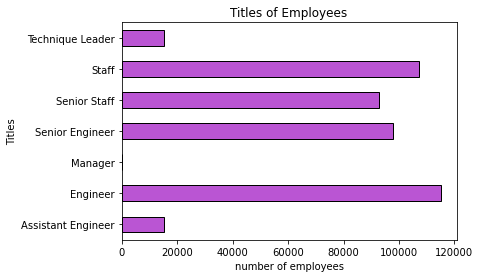

In [317]:
#plot it
emp_titles.plot(kind="barh", title = 'Titles of Employees', color='mediumorchid',ec='black')


plt.xlabel('number of employees')
plt.ylabel('Titles')
plt.show()

6. Join the employees and titles DataFrames together.

In [318]:
emp_titles_df = emp_df.merge(titles_df, how='inner')

7. Visualize how frequently employees change titles.


In [319]:
#join tables
joined_emp_titles= emp_titles_df.groupby('emp_no').title.count().value_counts()

In [320]:
joined_emp_titles

1    159754
2    137256
3      3014
Name: title, dtype: int64

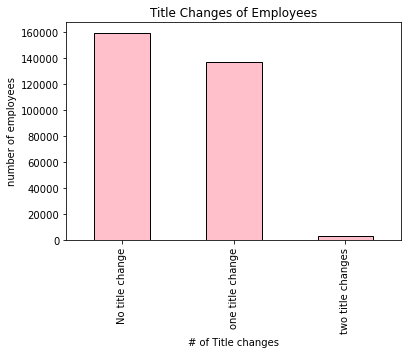

In [321]:
#plot it
joined_emp_titles.plot(kind="bar", title = 'Title Changes of Employees', color='pink',ec='black')
plt.xticks([0, 1, 2], ['No title change', 'one title change', 'two title changes'])

plt.xlabel('# of Title changes')
plt.ylabel('number of employees')
plt.show()

8. For each title, find the hire date of the employee that was hired most recently with that title.

In [322]:
emp_titles_df.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

9. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [323]:
the_df = pd.read_sql('SELECT * FROM employees JOIN dept_emp USING(emp_no) JOIN departments USING(dept_no) JOIN titles USING(emp_no)', emp_url)

In [324]:
pd.crosstab(the_df.title, the_df.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,298,7769,0,0,0,6445,1831,378,0
Engineer,2362,58135,0,0,0,49649,13852,2986,0
Manager,4,2,2,2,2,4,4,2,2
Senior Engineer,2027,49326,0,0,0,42205,11864,2570,0
Senior Staff,13925,1247,12139,12274,13940,1270,0,11637,36191
Staff,16150,1424,13929,14342,16196,1478,0,13495,41808
Technique Leader,309,7683,0,0,0,6557,1795,393,0
